In [16]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import  Dense, Reshape
from tensorflow.keras.layers import BatchNormalization, Activation, LeakyReLU, UpSampling2D, Conv2D, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential, Model
import numpy as np
import matplotlib.pyplot as plt

generator = Sequential() 
generator.add(Dense(128 * 7 * 7, input_dim=100, activation=LeakyReLU(0.2)))
generator.add(BatchNormalization()) 
generator.add(Reshape((7, 7, 128))) 
generator.add(UpSampling2D()) 
generator.add(Conv2D(64, kernel_size=5, padding='same'))  
generator.add(BatchNormalization())  
generator.add(Activation(LeakyReLU(0.2))) 
generator.add(UpSampling2D())   
generator.add(Conv2D(1, kernel_size=5, padding='same', activation='tanh'))

discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, input_shape=(28, 28, 1), padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding='same'))
discriminator.add(Activation(LeakyReLU(0.2)))
discriminator.add(Dropout(0.3))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy', optimizer='adam')
discriminator.trainable=False

ginput = Input(shape=(100,))
dis_output = discriminator(generator(ginput))
gan = Model(ginput, dis_output)
gan.compile(loss="binary_crossentropy", optimizer='adam')
gan.summary()

# 신경망을 싱행시키는 함수를 만듭니다.
def gan_train(epoch, batch_size, saving_interval) :

    # MNIST 데이터 불러오기

    (X_train, _), (_, _) = mnist.load_data()    # 앞서 불러온 적 있는 MNIST를 다시 이용합니다.
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
    X_train = (X_train - 127.5) / 127.5 # 픽셀값은 0에서 255 사이의 값 입니다.
    # X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

    true = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))
    
    for i in range(epoch) :
        # 실제 데이터를 판별자에 입력하는 부분입니다.
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]
        d_loss_real = discriminator.train_on_batch(imgs, true)

        # 가상 이미지를 판별자에 입력하는 부분입니다.
        noise = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(noise)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)

        # 판별자와 생성자의 오차를 계산합니다.
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        g_loss = gan.train_on_batch(noise, true)

        print("epoch:%d" % i, "d_loss : %.4f" % d_loss, "g_loss : %.4f" % g_loss)

        if i % saving_interval == 0 :
            # r.c = 5.5
            noise = np.random.normal(0, 1, (25, 100))
            gen_imgs = generator.predict(noise)
            # Rescale images 0 - 1
            gen_imgs = 0.5 * gen_imgs + 0.5

            fig, axs = plt.subplots(5, 5)
            count = 0
            for j in range(5) :
                for k in range(5) :
                    axs[j, k].imshow(gen_imgs[count, :, :, 0], cmap="gray")
                    axs[j, k].axis("off")
                    count += 1
                    fig.savefig("gan_images/gan_mnist_%d.png" % i)

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 sequential_23 (Sequential)  (None, 28, 28, 1)         865281    
                                                                 
 sequential_24 (Sequential)  (None, 1)                 212865    
                                                                 
Total params: 1,078,146
Trainable params: 852,609
Non-trainable params: 225,537
_________________________________________________________________


1/1 [==============================] - 0s 256ms/step
epoch:0 d_loss : 0.7022 g_loss : 0.5371
1/1 [==============================] - 0s 31ms/step
epoch:1 d_loss : 0.5204 g_loss : 0.2056
1/1 [==============================] - 0s 27ms/step
epoch:2 d_loss : 0.5588 g_loss : 0.0872
1/1 [==============================] - 0s 27ms/step
epoch:3 d_loss : 0.5534 g_loss : 0.1067
1/1 [==============================] - 0s 27ms/step
epoch:4 d_loss : 0.4878 g_loss : 0.2326
1/1 [==============================] - 0s 28ms/step
epoch:5 d_loss : 0.4629 g_loss : 0.4847
1/1 [==============================] - 0s 28ms/step
epoch:6 d_loss : 0.4583 g_loss : 0.6982
1/1 [==============================] - 0s 30ms/step
epoch:7 d_loss : 0.4604 g_loss : 0.8340
1/1 [==============================] - 0s 29ms/step
epoch:8 d_loss : 0.4545 g_loss : 0.8978
1/1 [==============================] - 0s 29ms/step
epoch:9 d_loss : 0.4623 g_loss : 0.8057
1/1 [==============================] - 0s 28ms/step
epoch:10 d_loss : 0.4771 g_

C:\Users\duja1\AppData\Local\Temp\ipykernel_7708\3582046440.py:74: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(5, 5)


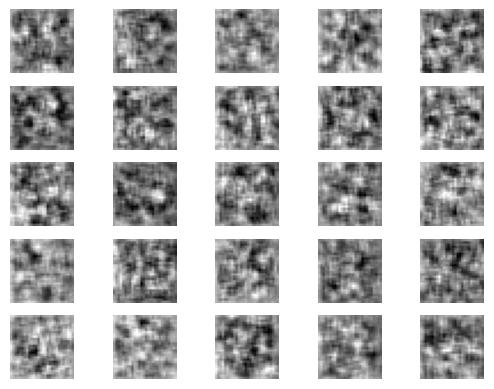

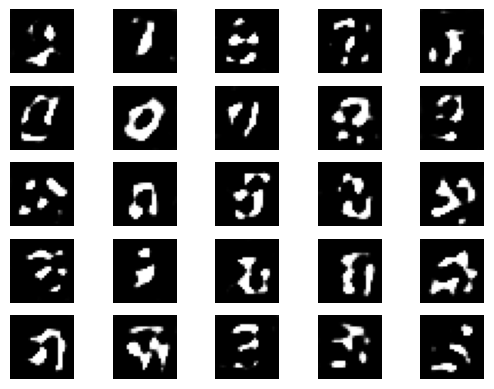

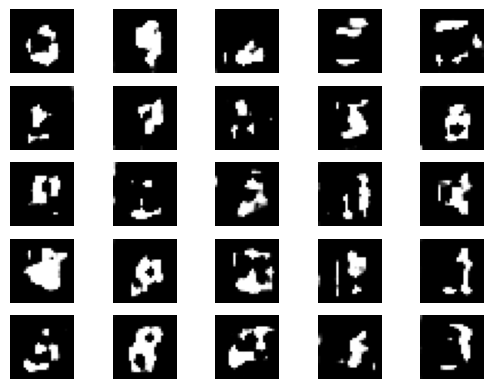

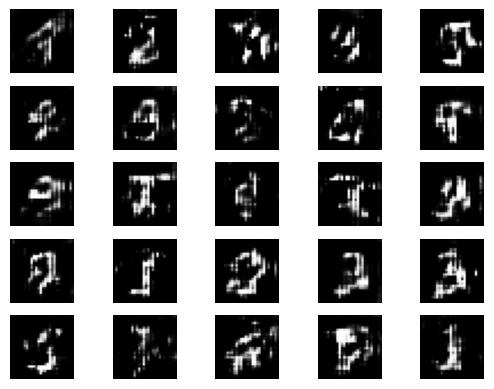

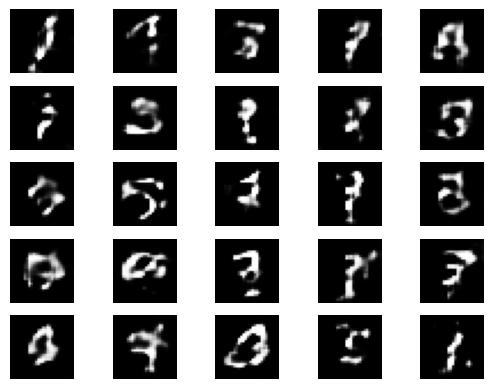

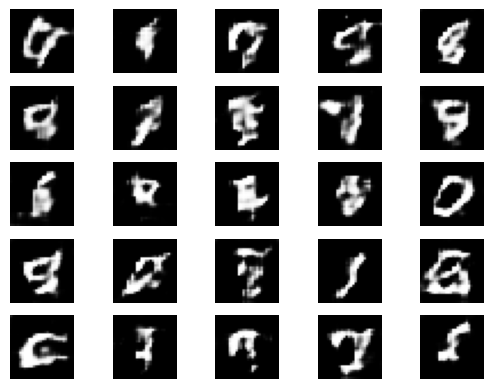

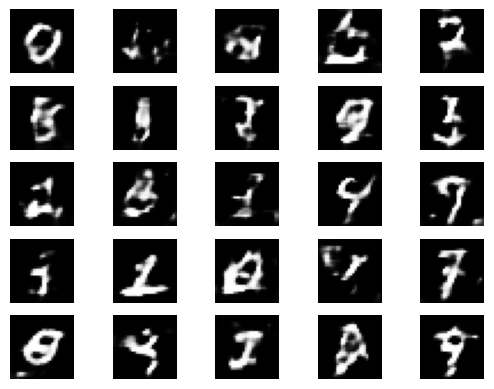

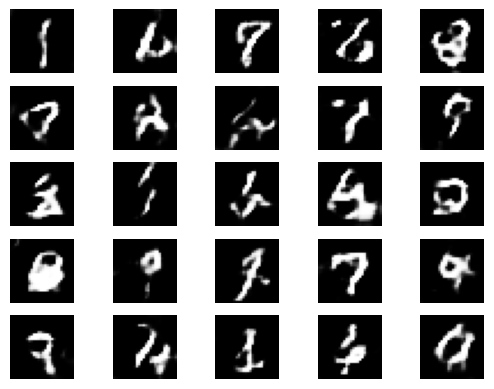

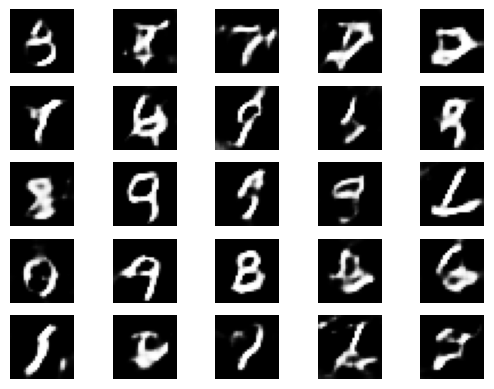

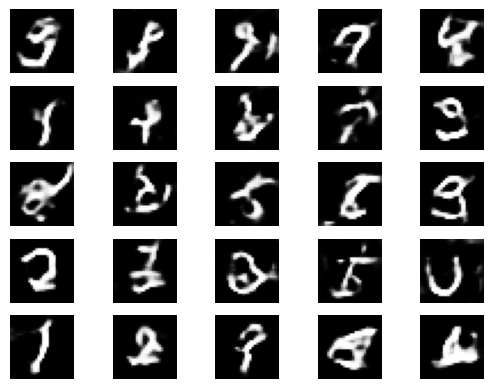

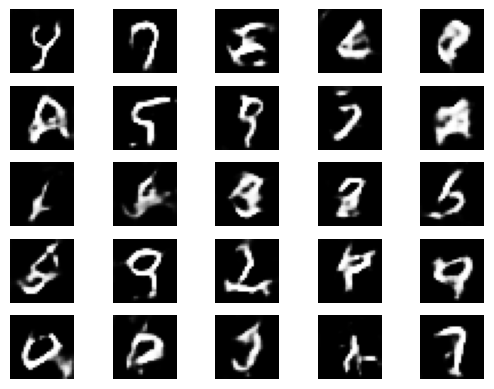

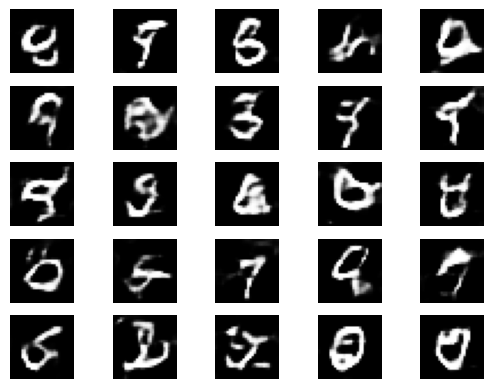

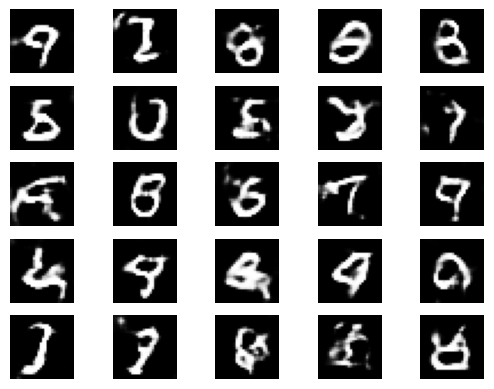

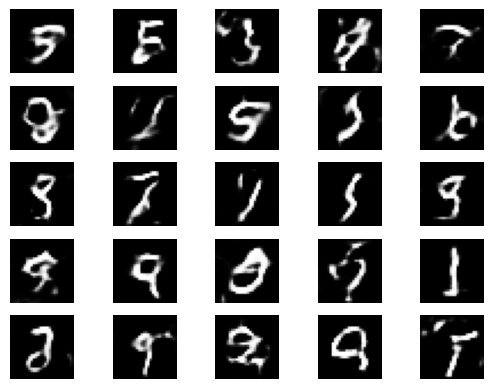

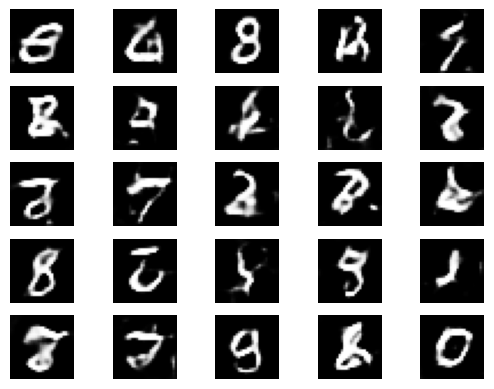

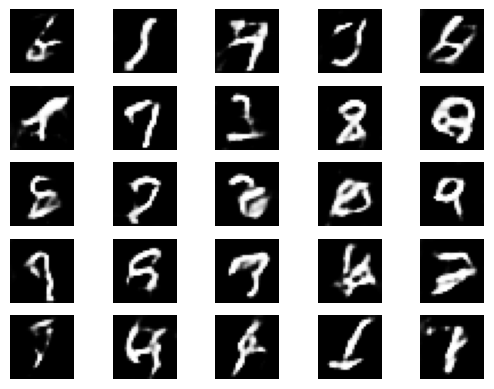

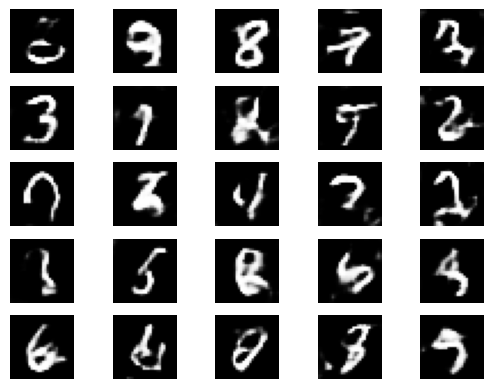

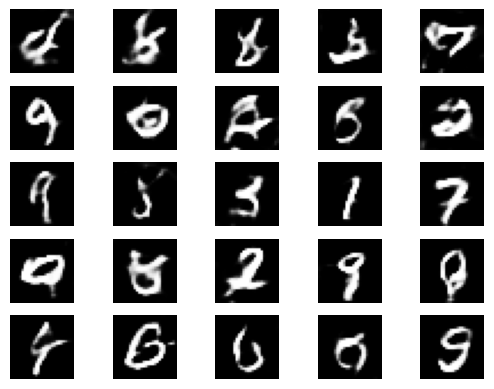

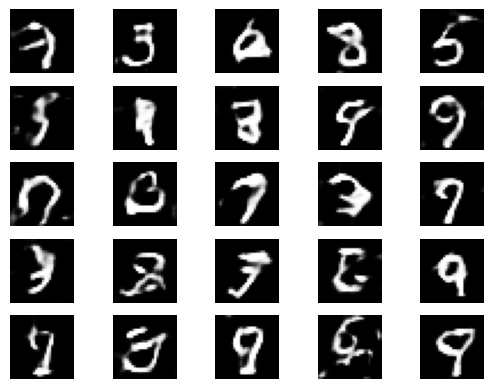

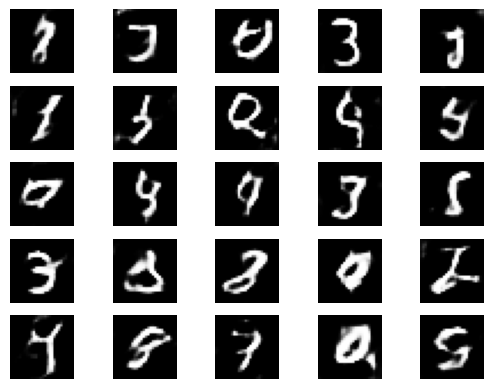

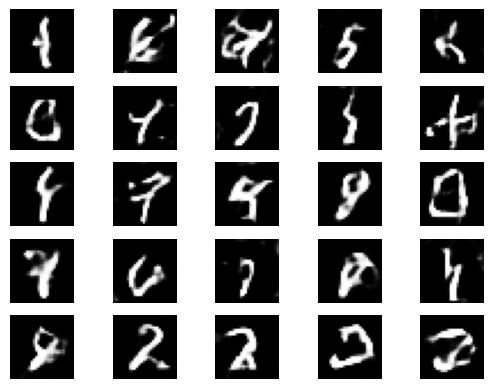

In [17]:
gan_train(4001, 32, 200)